In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = [
    {"Molecule": "H4", "Initial":3428, "QWC": 717, "GWC": 275, "Initial Sim Time":6.505, "QWC Sim Time": 2.301, "GC Sim Time": 1.617},
    {"Molecule": "LiH 3", "Initial":756, "QWC": 449, "GWC": 316, "Initial Sim Time":0.299, "QWC Sim Time":0.329, "GC Sim Time": 0.238},
    {"Molecule": "LiH 4", "Initial":3428, "QWC": 878, "GWC": 427, "Initial Sim Time":6.314, "QWC Sim Time":2.455, "GC Sim Time": 1.666},
    {"Molecule": "H6 18", "Initial":16196, "QWC": 3844, "GWC": 1858, "Initial Sim Time":500.500, "QWC Sim Time": 218.869, "GC Sim Time": 154.874},
    {"Molecule": "H6 22", "Initial":16196, "QWC": 3850, "GWC": 1946, "Initial Sim Time":505.794, "QWC Sim Time": 250.011, "GC Sim Time": 149.654},
    {"Molecule": "BeH2 6", "Initial":16196, "QWC": 1681, "GWC": 749, "Initial Sim Time":527.357, "QWC Sim Time":82.722, "GC Sim Time": 70.247},
    {"Molecule": "BeH2 7", "Initial":27124,"QWC": 3627, "GWC": 1580, "Initial Sim Time":3657.349, "QWC Sim Time":716.131, "GC Sim Time": 545.746},
]

# Add % Improvement without modifying or removing other keys
for entry in data:
    init = entry["Initial"]
    qwc = entry["QWC"]
    gwc = entry["GWC"]
    entry["% Change"] = round(((qwc - gwc) / qwc) * 100, 2)

df = pd.DataFrame(data)

# Select only the columns to display in the table
display_columns = ["Molecule", "Initial", "QWC", "GWC", "% Change"]

fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table with selected columns
table = plt.table(
    cellText=df[display_columns].values,
    colLabels=display_columns,
    cellLoc='center',
    loc='center',
)

table.auto_set_font_size(False)  # Disable auto font size adjustment
table.set_fontsize(16)  # Set a global font size (larger size)

# Adjust cell height to avoid excessive whitespace
for (i, j), cell in table.get_celld().items():
    # Increase height of cells to fill more space
    cell.set_height(0.14)  # Adjust cell height

# Save the table as a PDF
plt.savefig('graphics/vqe_comparison_table.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
plt.close()
plt.show()


In [14]:
hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC"]
gwc_gates = df["GWC"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="white", edgecolor="blue", alpha=0.7, hatch='///')
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="white", edgecolor="red", alpha=0.7, hatch='\\\\\\')

ax.set_xlabel("Hamiltonian (Initial)", fontsize=14)
ax.set_ylabel("Total Evaluation", fontsize=14)
ax.set_title("Gate Reduction After Intial VQE Round", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()

KeyError: 'Hamiltonian'

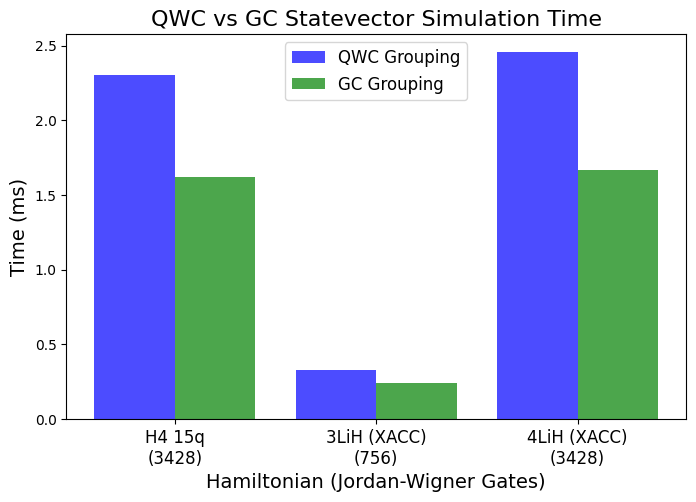

In [ ]:
hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC Sim Time"]
gwc_gates = df["GC Sim Time"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="blue", alpha=0.7)
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="green", alpha=0.7)

ax.set_xlabel("Hamiltonian (Jordan-Wigner)", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.set_title("QWC vs GC Statevector Simulation Time", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()

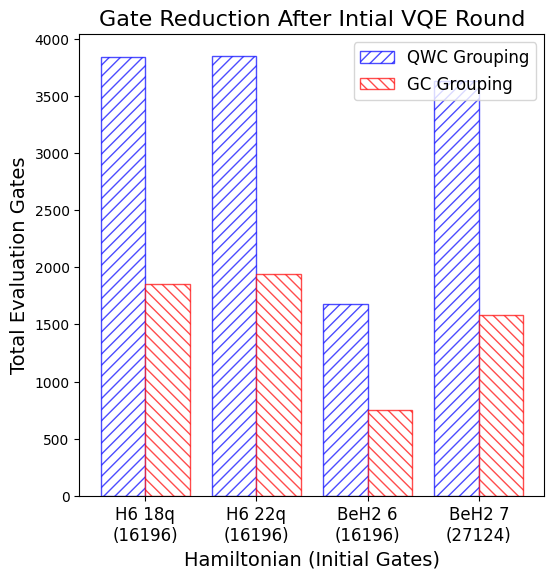

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = [
    {"Hamiltonian": "H6 18q\n(16196)", "QWC": 3844, "GWC": 1858, "Initial Sim Time":500.500, "QWC Sim Time": 218.869, "GC Sim Time": 154.874},
    {"Hamiltonian": "H6 22q\n(16196)", "QWC": 3850, "GWC": 1946, "Initial Sim Time":505.794, "QWC Sim Time": 250.011, "GC Sim Time": 149.654},
    {"Hamiltonian": "BeH2 6\n(16196)", "QWC": 1681, "GWC": 749, "Initial Sim Time":527.357, "QWC Sim Time":82.722, "GC Sim Time": 70.247},
    {"Hamiltonian": "BeH2 7\n(27124)", "QWC": 3627, "GWC": 1580, "Initial Sim Time":3657.349, "QWC Sim Time":716.131, "GC Sim Time": 545.746},
]

for entry in data:
    qwc = entry["QWC"]
    gwc = entry["GWC"]
    entry["% Improvement"] = round(((qwc - gwc) / qwc) * 100)

df = pd.DataFrame(data)    

hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC"]
gwc_gates = df["GWC"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="white", edgecolor="blue", alpha=0.7, hatch='///')
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="white", edgecolor="red", alpha=0.7, hatch='\\\\\\')
ax.set_xlabel("Hamiltonian (Initial)", fontsize=14)
ax.set_ylabel("Total Evaluation", fontsize=14)
ax.set_title("Gate Reduction After Intial VQE Round", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()

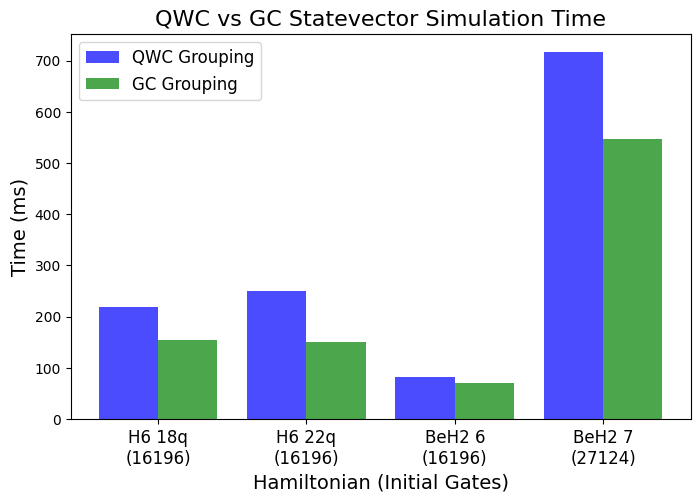

In [ ]:
hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC Sim Time"]
gwc_gates = df["GC Sim Time"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="blue", alpha=0.7)
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="green", alpha=0.7)

ax.set_xlabel("Hamiltonian (Initial)", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.set_title("QWC vs GC Statevector Simulation Time", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()